In [1]:
import arff

# Open the ARFF file
with open('../data/InsectSound_TRAIN.arff', 'r') as f:
    # Load the ARFF data
    arff_data = arff.load(f)

In [9]:
type(arff_data["data"][0][0])

float

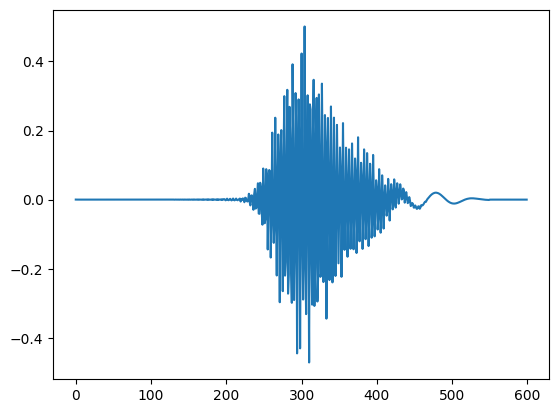

In [14]:
import matplotlib.pyplot as plt

sample = arff_data["data"][0][:-1]

plt.plot(sample)

# Classes

- Aedes_female: 0
- Aedes_male: 1
- Fruit_flies: 2
- House_flies: 3
- Quinx_female: 4
- Quinx_male: 5
- Stigma_female: 6
- Stigma_male: 7
- Tarsalis_female: 8
- Tarsalis_male: 9

In [12]:
import arff
import numpy as np
import pickle
import torch

def make_data(settype, classes):

    with open(f'../data/InsectSound_{settype}.arff', 'r') as f:
        arff_data = arff.load(f)

    x = [s[:-1] for s in arff_data["data"]]
    y = [s[-1] for s in arff_data["data"]]

    insect_dict = {
        'Aedes_female': 0,
        'Aedes_male': 1,
        'Fruit_flies': 2,
        'House_flies': 3,
        'Quinx_female': 4,
        'Quinx_male': 5,
        'Stigma_female': 6,
        'Stigma_male': 7,
        'Tarsalis_female': 8,
        'Tarsalis_male': 9
    }

    x = np.array(x)
    y = np.array([insect_dict[s] for s in y])

    def combine_classes(x, y, classes):

        x_new = []
        y_new = []

        for c in classes:
            x_new.append(x[y == c])
            y_new.append(y[y == c])

        return x, y
    
    x, y = combine_classes(x, y, classes)

    x = torch.tensor(x, dtype=torch.float)
    y = torch.tensor(y, dtype=torch.long)

    with open(f'../data/{settype}_{len(classes)}class.pkl', 'wb') as f:
        data = {
            'x': x,
            'y': y
        }
        pickle.dump(data, f)



classes = [0, 1]
# classes = [0, 1, 4, 5, 6, 7]

make_data("TRAIN", classes)
make_data("TEST", classes)